In [29]:
%matplotlib nbagg
import numpy as np
from skimage import filters,io, morphology, segmentation,exposure,feature,img_as_float,measure,exposure
import joblib
from matplotlib import pyplot as plt
from scipy import ndimage as nd
from sympy import Point,Line

In [1]:
# Define the image filepath
Img_fpath='/Users/simone/Google Drive/Lavoro_Ricerca/Teaching/Image Analysis University of Parma Sep 2016/Shared_Material/Data_practical/Hyb-11_20160524_175025_360_Seq0000_Syt6_pos_160.pkl.lzma'

In [15]:
# Load the image
ImgStack=joblib.load(Img_fpath)

In [38]:
Img=np.amax(ImgStack,axis=0)

<IPython.core.display.Javascript object>


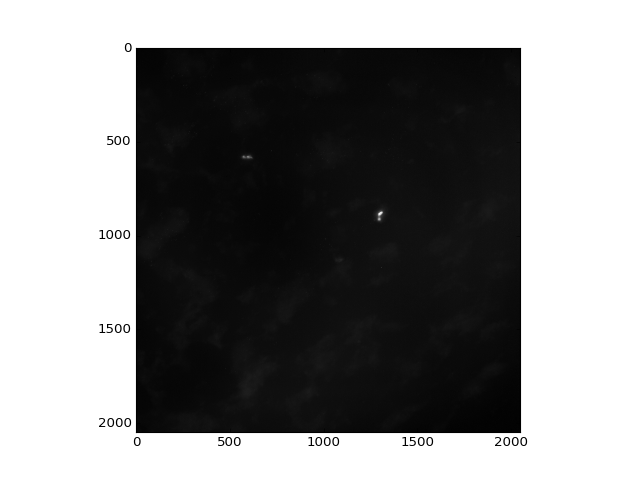

In [18]:
plt.figure()
plt.imshow(Img,cmap='gray')

In [19]:
# Remove the background from the image
Background=filters.gaussian(Img,sigma=10,mode='wrap')
ImgCleaned=Img-Background
ImgCleaned[ImgCleaned<0]=0

<IPython.core.display.Javascript object>


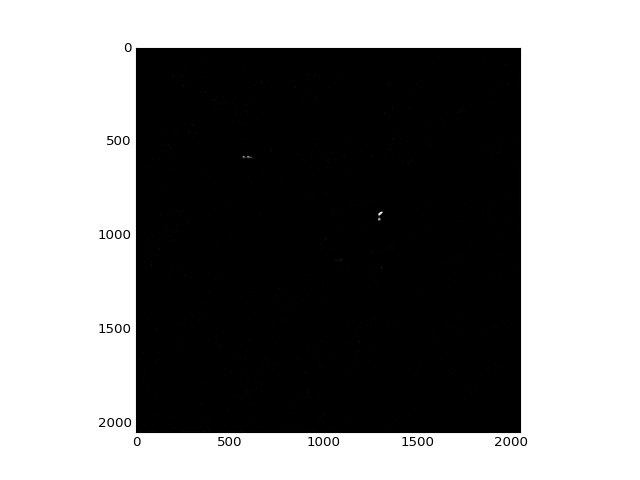

In [20]:
plt.figure()
plt.imshow(ImgCleaned,cmap='gray')

In [21]:
# Enhance the dots. It may not be necessary for your image
ImgLOG=nd.filters.gaussian_laplace(ImgCleaned,sigma=1)
ImgLOG=-ImgLOG # the peaks are negative so invert the signal
ImgLOG[ImgLOG<0]=0 # All negative values set to zero 

<IPython.core.display.Javascript object>


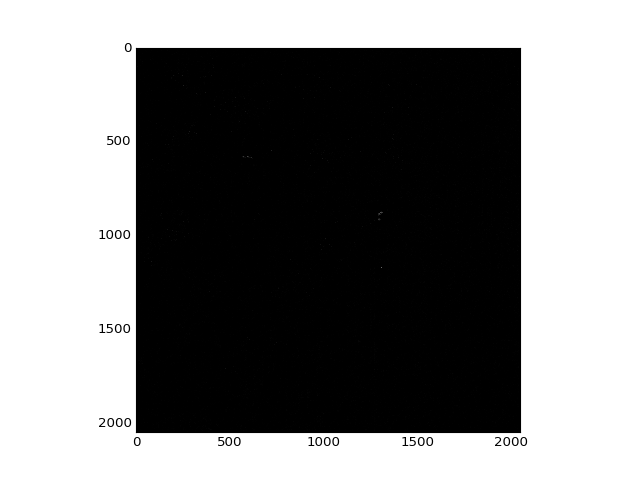

In [22]:
plt.figure()
plt.imshow(ImgLOG,cmap='gray')

In [96]:
# Define threshold
Selected_Thr=0.00020329440016937937

In [61]:
# Get the max peak
peaks=feature.peak_local_max(ImgLOG,min_distance=5,threshold_abs=Selected_Thr,exclude_border=True, indices=True, num_peaks=np.inf, footprint=None,labels=None)

In [62]:
print('Total peaks= ',len(peaks))

Total peaks=  254


<IPython.core.display.Javascript object>


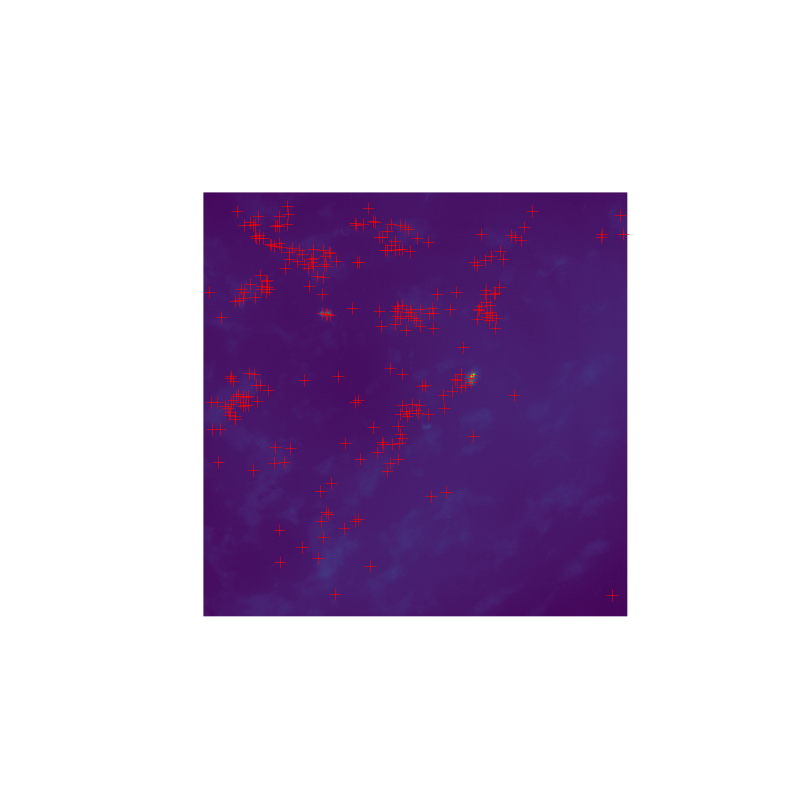

In [70]:
# Visualize the selected peaks
ImgView=10*(Img**0.7)
fig=plt.figure(figsize=(10,10))
plt.imshow(ImgView,cmap='viridis')
plt.axis('off')
plt.plot(peaks[:,1],peaks[:,0],'r+',markersize=10)